In [1]:
# import libraries
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F

# for importing data
import torchvision
import torchvision.transforms as T
from torch.utils.data import DataLoader,Subset

import sys

import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

<ipython-input-1-c09ee695da22>:17: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Import the data

In [3]:
# transformations
transform = T.Compose([ T.ToTensor(),
                        T.Normalize(.5,.5),
                       ])

# import the data and simultaneously apply the transform
dataset = torchvision.datasets.FashionMNIST(root='./data', download=True, transform=transform)

100%|██████████| 26421880/26421880 [00:01<00:00, 15223125.04it/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 276144.18it/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5058277.16it/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 19755056.72it/s]


Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



The code snippet demonstrates a process for filtering a PyTorch dataset to include only a specific subset of categories and subsequently creating a DataLoader for batch processing the filtered dataset. This process is essential for tasks where you need to work with a more focused dataset or when performing multi-class classification among selected classes. Here's an overview:

### Listing Dataset Categories
- The dataset's categories are listed using `dataset.classes`, which provides an insight into all available classes within the dataset. This step is crucial for understanding the dataset's composition and for selecting specific categories for subsequent operations.

### Selecting Specific Categories
- A selection of categories is made from the available classes. In this case, two sets of categories are proposed, with one set commented out. This allows for easy experimentation with different class subsets by uncommenting the desired line.

### Identifying Corresponding Data Indices
- For each selected category, its index is determined from `dataset.classes`. Then, all dataset indices corresponding to the selected categories are aggregated into `images2use`. This tensor ultimately contains the indices of all dataset entries belonging to the chosen classes.
- A print statement provides feedback about each added class, including its name and index, ensuring that the correct categories are being processed.

### Creating a DataLoader
- A `DataLoader` is instantiated for the filtered dataset using a `SubsetRandomSampler`, which ensures that only the data entries of interest (as specified by `images2use`) are included in the DataLoader. This approach facilitates efficient batching and shuffling of the selected subset.
- The `batch_size` parameter controls the number of items per batch, and `drop_last` dictates whether to exclude the last batch if it contains fewer than `batch_size` items.

This procedure is beneficial when dealing with large datasets or when interested in focusing on specific classes within a dataset. By efficiently filtering the dataset and creating a DataLoader, this code enables targeted data processing and model training on a curated subset of categories.


In [4]:
# list the categories
print(dataset.classes)

# pick three categories (leave one line uncommented)
# classes2keep = [ 'Trouser','Sneaker','Pullover' ]
classes2keep = [ 'Trouser','Sneaker', 'Sandal'  ]



# find the corresponding data indices
images2use = torch.Tensor()
for i in range(len(classes2keep)):
  classidx = dataset.classes.index(classes2keep[i])
  images2use = torch.cat( (images2use,torch.where(dataset.targets==classidx)[0]), 0).type(torch.long)
  print(f'Added class {classes2keep[i]} (index {classidx})')

# now select just those images

# transform to dataloaders
batchsize   = 100
sampler     = torch.utils.data.sampler.SubsetRandomSampler(images2use)
data_loader = DataLoader(dataset,sampler=sampler,batch_size=batchsize,drop_last=True)

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
Added class Trouser (index 1)
Added class Sneaker (index 7)
Added class Sandal (index 5)


The code snippet is designed to visualize a selection of images from a dataset after they have been batched by a DataLoader in PyTorch. This visualization can help in understanding the dataset's characteristics, ensuring the data loading process works as expected, and simply exploring the dataset's contents. Here's a detailed breakdown:

### Image Visualization Process
- **Data Loading**: A single batch of images (`X`) and their corresponding labels (`y`) is retrieved from the `data_loader` using the `next(iter(data_loader))` construct. This method fetches the next batch of data, which is ready for inspection or processing.

- **Figure Setup**: A matplotlib figure and a grid of subplots (`axs`) are created with `plt.subplots`, arranged in 3 rows and 6 columns. This setup provides a structured canvas for displaying multiple images side by side.

- **Image Display**:
  - For each subplot, an image from the batch is selected and processed for display. The images are "un-normalized" by reversing the normalization applied during the dataset preprocessing (`pic = pic/2 + .5`). This step is necessary to convert the images back to their original pixel value range for proper visualization.
  - Each image's corresponding label is retrieved using `dataset.classes[y[i]]`, translating the numerical label back into a readable class name.
  - The image is displayed in grayscale (`cmap='gray'`) using `ax.imshow(pic)`, and the class label is overlaid on the image using `ax.text`. The label text is formatted for better visibility against the image background.
  - Axes are turned off (`ax.axis('off')`) for each subplot to focus solely on the images and their labels.

- **Presentation**: `plt.tight_layout()` is called to adjust the subplots' layout, followed by `plt.show()` to render the figure. This arrangement ensures that the images and their labels are presented clearly and legibly.

This approach to visualizing images and their labels from a dataset is invaluable for various stages of a machine learning project, from initial data exploration to evaluating preprocessing steps and inspecting model predictions.


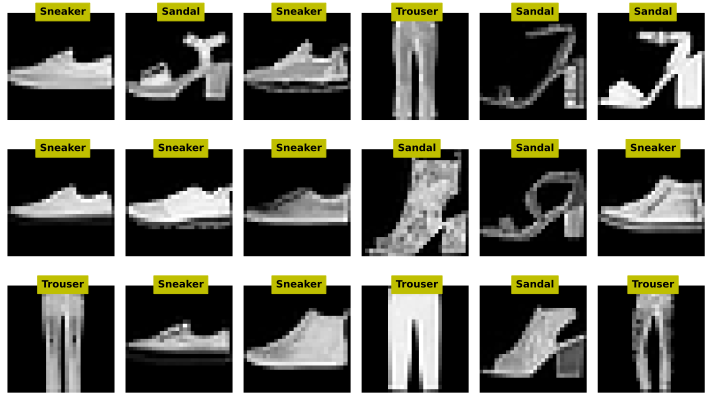

In [5]:
# view some images
# inspect a few random images

X,y = next(iter(data_loader))

fig,axs = plt.subplots(3,6,figsize=(10,6))

for (i,ax) in enumerate(axs.flatten()):

  # extract that image
  pic = torch.squeeze(X.data[i])
  pic = pic/2 + .5 # undo normalization

  # and its label
  label = dataset.classes[y[i]]

  # and show!
  ax.imshow(pic,cmap='gray')
  ax.text(14,0,label,ha='center',fontweight='bold',color='k',backgroundcolor='y')
  ax.axis('off')

plt.tight_layout()
plt.show()

# Create classes for the discriminator and generator

In [6]:
class discriminatorNet(nn.Module):
  def __init__(self):
    super().__init__()

    self.fc1 = nn.Linear(28*28,256)
    self.fc2 = nn.Linear(256,256)
    self.out = nn.Linear(256,1)

  def forward(self,x):
    x = F.leaky_relu( self.fc1(x) )
    x = F.leaky_relu( self.fc2(x) )
    x = self.out(x)
    return torch.sigmoid( x )

dnet = discriminatorNet()
y = dnet(torch.randn(10,784))
y

tensor([[0.5281],
        [0.5045],
        [0.5131],
        [0.5205],
        [0.4837],
        [0.5050],
        [0.4934],
        [0.4974],
        [0.5026],
        [0.4953]], grad_fn=<SigmoidBackward0>)

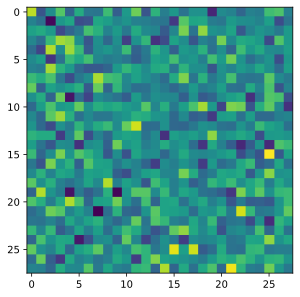

In [7]:
class generatorNet(nn.Module):
  def __init__(self):
    super().__init__()

    self.fc1 = nn.Linear(64,256)
    self.fc2 = nn.Linear(256,256)
    self.out = nn.Linear(256,784)

  def forward(self,x):
    x = F.leaky_relu( self.fc1(x) )
    x = F.leaky_relu( self.fc2(x) )
    x = self.out(x)
    return torch.tanh( x )


gnet = generatorNet()
y = gnet(torch.randn(10,64))
plt.imshow(y[0,:].detach().squeeze().view(28,28));

# Train the models!

In [8]:
# loss function
lossfun = nn.BCELoss()

# create instances of the networks and push to the GPU
dnet = discriminatorNet().to(device)
gnet = generatorNet().to(device)

# same algo but different instances for the G and D networks
d_optimizer = torch.optim.Adam(dnet.parameters(), lr=.0003)
g_optimizer = torch.optim.Adam(gnet.parameters(), lr=.0003)

The code outlines the training loop for a Generative Adversarial Network (GAN) over a calculated number of epochs, based on the total number of batches (`50000`) and the length of the `data_loader`. The loop involves alternating training steps for both the discriminator (`dnet`) and generator (`gnet`) networks, focusing on improving their adversarial capabilities over time. The process is expected to take approximately 13 minutes for 50k batches. Here's a structured explanation:

### Epoch Calculation
- `num_epochs` is determined by dividing the desired total number of batches by the number of batches in the `data_loader`. This ensures the training process iterates through the specified number of batches, spread across multiple epochs.

### Loss Tracking
- A `losses` array is initialized to record the loss values for both the discriminator and generator at each batch. `lossi` serves as an index counter for updating this array.

### Training Loop
- The outer loop iterates over each epoch, while the inner loop iterates over each batch of data from the `data_loader`.
  
### Discriminator Training
- **Real Images**: Each batch of real images is processed, and the discriminator's loss (`d_loss_real`) is calculated based on its ability to correctly identify real images.
- **Fake Images**: Fake images generated by `gnet` are fed to the discriminator, and the loss (`d_loss_fake`) assesses the discriminator's performance on these fake images.
- The discriminator's total loss (`d_loss`) is the sum of `d_loss_real` and `d_loss_fake`. This loss is used for backpropagation to update the discriminator's parameters.

### Generator Training
- New fake images are generated, and the discriminator evaluates them. The generator's loss (`g_loss`) is computed based on the discriminator's predictions, aiming to improve the generator's ability to produce convincing fake images.
- The generator's loss is also used for backpropagation to update its parameters.

### Progress Updates
- A message is printed at the end of each epoch to indicate progress, providing real-time feedback on the training process.

### Key Considerations
- **GPU Acceleration**: The code leverages a GPU (`device`) for training if available, enhancing computational efficiency.
- **Loss Functions**: A binary cross-entropy loss function (`lossfun`) is used for both networks, fitting the binary classification nature of the discriminator's task.

This training loop embodies the core of GAN training, where the discriminator and generator iteratively improve through competition, ultimately leading to the generation of high-quality fake images that closely mimic the real data distribution.


In [9]:
# this cell takes ~13 mins with 50k batches
num_epochs = int(50000/len(data_loader))

losses = np.zeros((num_epochs*len(data_loader),2))
lossi  = 0

for epochi in range(num_epochs):

  for data,_ in data_loader:

    # send data to GPU
    data = data.view(batchsize,-1).to(device)


    # labels used for real and fake images
    real_labels = torch.ones(batchsize,1).to(device)
    fake_labels = torch.zeros(batchsize,1).to(device)



    ### ---------------- Train the discriminator ---------------- ###

    # forward pass and loss for REAL pictures
    pred_real   = dnet(data)                     # output of discriminator
    d_loss_real = lossfun(pred_real,real_labels) # all labels are 1

    # forward pass and loss for FAKE pictures
    fake_images = gnet( torch.randn(batchsize,64).to(device) ) # output of generator
    pred_fake   = dnet(fake_images)                            # pass through discriminator
    d_loss_fake = lossfun(pred_fake,fake_labels)               # all labels are 0

    # collect loss (using combined losses)
    d_loss = d_loss_real + d_loss_fake
    losses[lossi,0] = d_loss.item()

    # backprop
    d_optimizer.zero_grad()
    d_loss.backward()
    d_optimizer.step()



    ### ---------------- Train the generator ---------------- ###

    # create fake images and compute loss
    fake_images = gnet( torch.randn(batchsize,64).to(device) )
    pred_fake   = dnet(fake_images)

    # compute and collect loss
    g_loss = lossfun(pred_fake,real_labels)
    losses[lossi,1] = g_loss.item()

    # backprop
    g_optimizer.zero_grad()
    g_loss.backward()
    g_optimizer.step()

    # increment loss counter
    lossi += 1


  # print out a status message
  msg = f'Finished epoch {epochi+1}/{num_epochs}'
  sys.stdout.write('\r' + msg)


Finished epoch 277/277

The provided code snippet defines a simple yet effective function for smoothing 1D data using a convolution operation. This function, named `smooth`, takes a 1D array `x` and an optional kernel size `k` (with a default value of 15) and returns a smoothed version of the input array. Here's a breakdown of the function and its utility in data processing:

### Function Overview
```python
def smooth(x,k=15):
  return np.convolve(x,np.ones(k)/k,mode='same')


### Parameters:

- **x**: The 1D array or list to be smoothed. This could represent any form of univariate data, such as time series, signal measurements, or even moving averages of financial data.
- **k**: The size of the smoothing kernel, which determines how many adjacent values in the input array `x` are considered for computing each smoothed value. A larger `k` results in smoother output but may also blur rapid changes in the data.

### Operation:

- The function uses `np.convolve` to apply a convolution operation between the input array `x` and a smoothing kernel. The kernel is generated as an array of ones (`np.ones(k)`) divided by `k`, which creates a simple averaging filter of size `k`.
- The `mode='same'` argument ensures that the output array is the same size as the input array `x`, padding the input as necessary to apply the filter to the edges.

### Utility:

- Smoothing is a common preprocessing step in data analysis and signal processing to reduce noise and reveal underlying trends or patterns in the data.
- The simplicity of the averaging filter used here makes this function versatile and quick to apply, suitable for exploratory data analysis and preprocessing before more complex analyses.

This `smooth` function exemplifies how convolution operations can be leveraged for data smoothing, providing a straightforward tool for enhancing the interpretability of 1D datasets.


In [10]:
# create a 1D smoothing filter
def smooth(x,k=15):
  return np.convolve(x,np.ones(k)/k,mode='same')

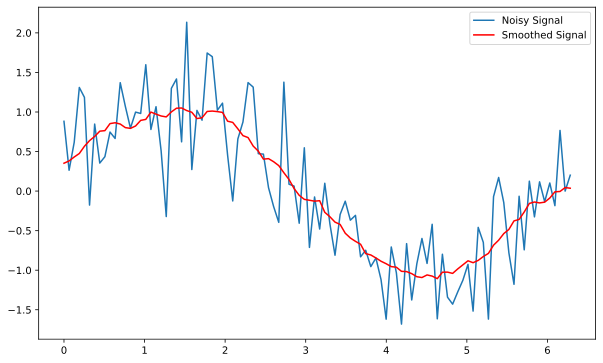

In [11]:


# Generate a noisy signal
np.random.seed(0) # For reproducibility
x = np.linspace(0, 2*np.pi, 100)
y = np.sin(x) + np.random.normal(0, 0.5, 100)

# Apply the smoothing function
y_smoothed = smooth(y, k=15)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Noisy Signal')
plt.plot(x, y_smoothed, label='Smoothed Signal', color='red')
plt.legend()
plt.show()


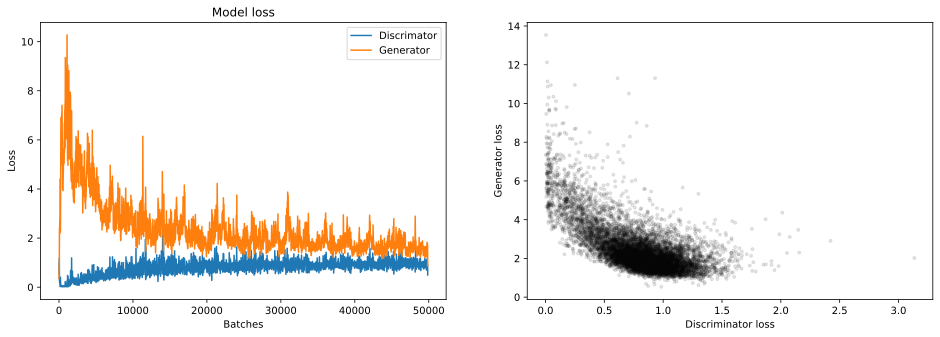

In [12]:
fig,ax = plt.subplots(1,2,figsize=(16,5))

ax[0].plot(smooth(losses[:,0]))
ax[0].plot(smooth(losses[:,1]))
ax[0].set_xlabel('Batches')
ax[0].set_ylabel('Loss')
ax[0].set_title('Model loss')
ax[0].legend(['Discrimator','Generator'])
# ax[0].set_xlim([4000,6000])

ax[1].plot(losses[::5,0],losses[::5,1],'k.',alpha=.1)
ax[1].set_xlabel('Discriminator loss')
ax[1].set_ylabel('Generator loss')

plt.show()

# Let's see some fake fashion!

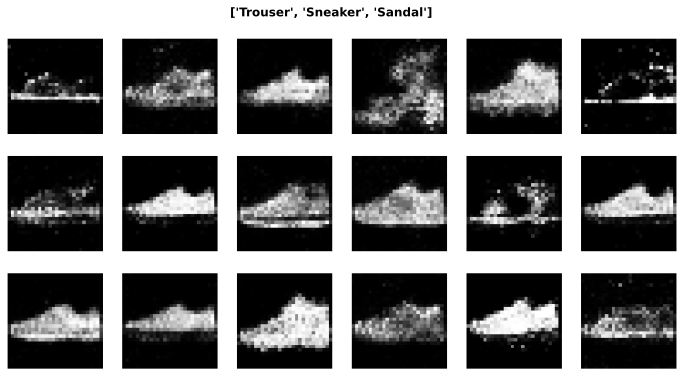

In [13]:
# generate the images from the generator network
gnet.eval()
fake_data = gnet(torch.randn(18,64).to(device)).cpu()

# and visualize...
fig,axs = plt.subplots(3,6,figsize=(12,6))
for i,ax in enumerate(axs.flatten()):
  ax.imshow(fake_data[i,:,].detach().view(28,28),cmap='gray')
  ax.axis('off')

plt.suptitle(classes2keep,y=.95,fontweight='bold')
plt.show()